In [203]:
import numpy as np
import itertools
%matplotlib inline
from matplotlib import pyplot as plt

Testing the following equations for $\Delta(w,u)=f(w+u)-f(w)$
$$
\mathbb{E}\Delta(w,u)=f'_i\mathbb{E}u+\frac{1}{2}f''_{ii}\mathbb{V}ar u+\frac{1}{2}\mathbb{E}u^Tf''_{ij}\mathbb{E}u+\mathcal{O}(\alpha^3)
$$

$$
\mathbb{E}\Delta(w,u)=(f'_i)^2\mathbb{V}ar u+(f'_{i}\mathbb{E} u)^2+\mathcal{O}(\alpha^3)
$$

Will use Gaussian input $\mathbb{R}^d\ni x\sim N(\mu_x,\sigma_x^2 I)$, one hidden layer with $\sigma(x)=\frac{1}{1+e^{-x}}$ and Gaussian weights $w\in\mathbb{R}^d$ with $w\sim N(\mu_w,\sigma_w^2 I)$

The distribution of crashes of inputs is Bernoulli with parameter $p$.

In [309]:
mu_x = 0.5
sigma_x = 1
mu_w = 0.1
sigma_w = 1
d = 10
p = 0.2

In [310]:
# generating x and w
x = np.random.randn(d, 1) * sigma_x + mu_x
w = np.random.randn(d, 1) * sigma_w + mu_w

In [311]:
def sigma(x):
    """ Activation fcn """
    return 1. / (1 + np.exp(-x))

def sigma_dot(x):
    """ Derivative of sigma """
    return sigma(x) * (1. - sigma(x))

def sigma_ddot(x):
    """ Double derivative of sigma """
    return sigma(x) * (1. - sigma(x)) * (1. - 2 * sigma(x))

In [312]:
fracs = []

In [356]:
def compute_mean_and_var(fcn, p):
    """ Compute expectation and variance of fcn given Bernoulli crashes w.p. p """
    # all combinations
    combinations = list(itertools.product([0, 1], repeat=len(x)))
    
    # resulting expectation of fcn
    result_f = 0.
    
    # resulting expectation of fcn^2
    result_f_sq = 0.
    
    # number of entries in x
    n = len(x)

    # all probs
    probs = 0
    
    for c in combinations:
        # crashing inputs
        x1 = np.multiply(x.reshape(-1), c)
        
        # number of crashes
        k = len(c) - np.sum(c)
        
        # probability of this event
        prob = p ** k * (1 - p) ** (n - k)
        
        # how much vector is changed in norm?
        alpha = np.linalg.norm(x.reshape(-1) - x1) / np.linalg.norm(x)
        
        #if alpha > 0.2:
#            continue
        
        fracs.append(prob * alpha)
        
        #print(n, k, prob, fcn(x1))
        
        # computing expectation
        result_f += fcn(x1) * prob
        result_f_sq += fcn(x1) ** 2 * prob
        
        probs += prob
        
    result_f /= probs
    result_f_sq /= probs
        
    return result_f, result_f_sq - result_f ** 2

In [357]:
def nn(x):
    """ Neural network at pt x """
    return np.mean(sigma(x.T @ w))

In [358]:
z = np.mean(x.T @ w)
def delta(x1):
    """ Error delta(input crash) """
    return nn(x1) - nn(x)

In [359]:
compute_mean_and_var(delta, p)

(-0.09624014219911475, 0.05918526677072737)

(array([3.11e+03, 2.50e+01, 9.60e+01, 1.40e+01, 4.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.20e+01, 3.00e+00]),
 array([0.        , 0.00146157, 0.00292314, 0.00438471, 0.00584628,
        0.00730786, 0.00876943, 0.010231  , 0.01169257, 0.01315414,
        0.01461571]),
 <a list of 10 Patch objects>)

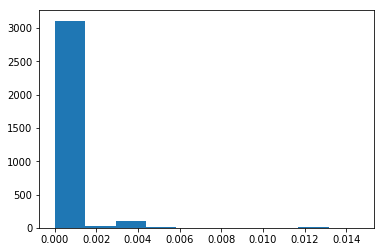

In [360]:
plt.hist(fracs)

In [361]:
Eu = -p * w
Varu = (p - p ** 2) * w ** 2

In [362]:
f_i = sigma_dot(z) * x
f_ij = sigma_ddot(z) * x @ x.T
f_ii = f_ij.diagonal()

In [363]:
np.dot(f_i.T, Eu) + 0.5 * np.dot(f_ii, Varu) + 0.5 * Eu.T @ f_ij @ Eu

array([[-0.14305369]])

In [364]:
np.dot(f_i.T, Eu) ** 2 + np.dot(f_i.T ** 2, Varu)

array([[0.06063277]])

In [365]:
np.dot(f_i.T, Eu)

array([[-0.04349106]])